# Programación Orientada a Objetos en Python

## Programación para Analítica de Datos
### Mtra. Gisel Hernández Chávez

## Temas
+ Definición de clase
+ Construcción de una clase y métodos mágicos \__new\__() e \__init\__()
+ Inicializador y uso de _self_
+ Atributos de instancia
+ Uso de _cls_ con \__new\__ (cls)
+ objeto = instancia de clase
+ Atributo de clase y atributo de instancia
+ Clase que hereda de un tipo de colección existente como list o set.
+ Uso de dir(), \__main\__ , \__dict\__  y  \__class\__
+ Introducción a los métodos get() y set()

### Definición de clase

+ Define los datos y métodos de todos los objetos del mismo tipo. Es como un patrón.
+ Se usa la palabra reservada __class__
+ **__init()__** es un método mágico (se ejecuta sin invocarse directamente) que inicializa al objeto. Es invocado por el constructor **__new()__**
+ Luchador es subclase de object y hereda sus propiedades.
+ Las propiedades pueden ser atributos o métodos
+ Los métodos de instancia tienen a self (id con la dirección del objeto) como su primer parámetro
+ La clase define a un nuevo tipo de datos
+ Los módulos de python y las funciones también se tratan como objetos

In [1]:
class Luchador:

    # Inicializador / Atributos de instancia
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad


In [2]:
id (Luchador) # dirección del objeto de tipo clase (no una instancia de clase)

1755644581264

In [3]:
dir(Luchador)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [4]:
import sys

sys.getsizeof(Luchador)

1688

In [5]:
cavernario = Luchador('cavernario',50)
cavernario

In [6]:
sys.getsizeof(cavernario)

56

In [7]:
type(cavernario)

__main__.Luchador

In [8]:
cavernario.nombre

'cavernario'

## Mostrar todas las propiedades de la clase object

+ Con dunder (double underscore) se muestran métodos mágicos y atributos privados
+ Un solo subrayado se aconseja para las propiedades protegidas (para manipulación de la propia clase y sus herederos)

In [9]:
dir(object)  # solo tiene métodos mágicos

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

## Construcción de objetos

+ Una subclase puede heredar un método o redefinirlo. En este último caso anula al del padre. Si quiere que se ejecute el del padre cuando lo anula, tiene que invocarlo explícitamente.


In [10]:
help(object.__new__)  # constructor que crea un objeto y lo retorna, llama a __init__() para que inicialice

Help on built-in function __new__:

__new__(*args, **kwargs) method of builtins.type instance
    Create and return a new object.  See help(type) for accurate signature.



### Métodos mágicos \__ new \__ () e \__ init \__ () durante la construcción de un objeto

+ Primero se ejecuta \__new\__ y luego \__init\__, que ya recibe del primero _self_
+ _cls_ indica la clase

### Anulación de \__ new \__ () de la clase object

+ En la clase object, su método \__ new \__ () llama a \__ init \__ ()  ,pasándole _self_
+ Si lo anula en una subclase (lo sobre escribe) y no llama explícitamente a init, nunca se ejecutará
+ Normalmente no se sobreescribe o anula el método \__ new\__()

In [11]:
class A(object):  # object es el que está en el tope de la jerarquía y si no se pone se asume por defecto
    
    # Anulación por sobreescritura
    def __new__(cls):  # constructor
        print( "A.__new__ called")
        return super(A, cls).__new__(cls)  # pero se asegura de llamar al new de la superclase

    def __init__(self):  # inicializador
        print( "A.__init__ called")

In [12]:
a1 = A() # se ejecuta el new y luego el init


A.__new__ called
A.__init__ called


## <font color = 'red'>  Nota importante </font>

Como no se ha definido un método \__ repr \__ (o \__ str \__ ) en la clase A, esta hereda los de la superclase __object__ y en el mismo se indica que se coloca el ámbito (\__ main \__ en este caso), que es el ámbito del módulo. Entonces, todas sus instancias de clase se expresan de esa manera. En cuanto a la clase en sí, debe cambiar \__ repr \__ (o \__ str \__ ) en la metaclase, es decir, la clase de la cual nuestra clase en cuestión es una instancia; la metaclase predeterminada es type. 

+ Recuerde que \__ main \__ es el nombre del módulo cuando no se ejecuta el mismo desde un import (caso en el cual el nombre es el nombre del archivo. Como aquí lo está ejecutando directamente, se considera como un script y todos los scripts tienen el nombre __main__ en Python.

Hay un punto . en el medio porque A es un atributo del script \__ main \__ , el módulo; y pertenece al ámbito de nivel de módulo.

In [13]:
__name__ == '__main__'

True

In [14]:
a1 = A
a1

__main__.A

### Clase en la que no se llama al \__ new \__ () de la superclase y, por tanto, no se ejecuta \__ init \__ ()

In [15]:
class B():

    def __new__(cls):
        print ("B.__new__ called") # no se llama al new de la superclase

    def __init__(self):  # Nunca es llamado
        print ("B.__init__ called" ) 

print (B()) # __new__() de B retorna None

B.__new__ called
None


Se imprime None porque \__new__\(cls) devuelve None (por defecto si no tiene return con alguna otra cosa)

In [16]:
class B1():

    def __new__(cls):  # no se llama al new de la superclase
        print ("B.__new__ called")
        return "y nada más"

    def __init__(self):  # Nunca es llamado
        print ("B.__init__ called" ) 

print (B1())

B.__new__ called
y nada más


In [17]:
class B2():

    def __new__(cls):
        print ("B.__new__ called")
        return super().__new__(cls)
         

    def __init__(self):
        print ("B.__init__ called" ) # Nunca es llamado

B2()

B.__new__ called
B.__init__ called


### Atributos de instancia

En el ejemplo anterior _nombre_ y _edad_ son atributos de instancia, por lo que sus valores son propios de cada objeto. Si se cambia el valor de los mismos en un objeto, no afecta a los otros objetos.

### Creación de instancia de clase, o sea, creación de objeto

+ bd es un objeto de la clase Luchador
+ A través de la notación de punto (_dot_) se puede manipular a los atributos de datos y de comportamiento (métodos)

In [18]:
# En la creación se pasan los valores iniciales de los atributos
bd = Luchador('Blue Demon',33)

In [19]:
# Se usa la notación de punto para acceder a las propiedades de los objetos
bd.nombre, bd.edad

('Blue Demon', 33)

In [20]:
try:
    cavernario.deportista  ## levanta excepción porque no tiene ee atributo
except Exception as e:
    print(e)

'Luchador' object has no attribute 'deportista'


### Atributo de clase

En la siguiente redefinición de la clase Luchador agregamos un atributo de clase. Todos los objetos de esa clase tendrán el mismo valor del atributo de datos _deportista_.

In [21]:
class Luchador:

    # Atributo de Clase
    deportista = True

    # Inicialiador / Atributos de instancia (objeto, ejemplar, caso concreto de la clase)
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

In [22]:
cavernario = Luchador('cavernario',50) # nuevo objeto cavernario
cavernario.deportista

True

In [23]:
em = Luchador('Santo',34)
em.deportista # Note que tiene el mismo valor que cavernario en su atributo deportista

True

In [24]:
# Como se redefinió la clase, hay que volver a crear el objeto, de lo contrario se levanta un error
bd = Luchador('Blue Demon',33)
bd.deportista

True

### Otras características de un atributo de clase

En la siguiente redefinición de la clase Luchador agregamos un atributo de clase llamado tipo y un método de clase llamado set_tipo(). Se le tiene que colocar el decorador __@classmethod__

+ Note que no tiene el parámetro _self_ porque no es método de instancia y se invoca con el nombre de la clase, dado que no es específico para ningún objeto.

También se han agregado otros dos métodos de instancia.

+ Note que se emplea un decorador precedido por @ para indicar que el método set_tipo es un método de clase
+ Los métodos de clase tienen como primer parámetro a cls que es la dirección de el objeto con las propiedades de la clase.

In [25]:
class Luchador:

    # Atributos de Clase
    deportista = True
    tipo = 'técnico'    # de dato
    
    @classmethod    # decorador indicando que es un método de clase
    def set_tipo(cls,t):       # de método
        cls.tipo = t

    # Atributos de instancia
    
    # Inicializador 
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad
    
    # otro método de instancia
    def tiempovida(self):
        return "{} murió a los {} años".format(self.nombre, self.edad)
    
    # otro método de instancia
    def llavepreferida(self, llave):
        return "{} prefería {}".format(self.nombre, llave)


In [26]:
# Se redefinió la clase; hay que instanciar objetos de la clase Luchador
bd = Luchador("Blue Demon", 78)
s = Luchador("El Santo", 66)

# Acceso a atributos de instancia
print("{} murió a los {} años y {} a los {}.".format(s.nombre, s.edad, bd.nombre, bd.edad))

El Santo murió a los 66 años y Blue Demon a los 78.


In [27]:
# ¿Es El Santo un luchador rudo?
if s.tipo == "rudo":
    print("¡{0} es un {1}!".format(s.nombre, s.tipo))
else:
    print("¡{0} es un {1}!".format(s.nombre, s.tipo))
    

¡El Santo es un técnico!


### Ejercicios: 
+ Cambie el valor del atributo de clase __tipo__ a “rudo”. ¿Cree que sea correcto este diseño de colocar __tipo__ como atributo de clase?. 
+ Si no es correcto, redefina la clase Luchador.

In [28]:
Luchador.set_tipo('rudo')
bd.tipo   

'rudo'

In [29]:
lu = Luchador('Amenaza Roja',80)
lu.tipo

'rudo'

In [30]:
# Celda para solución del ejercicio con la redefinición de la clase
class Luchador:

    # Atributos de Clase
    deportista = True   # de dato
    
    @classmethod    # decorador indicando que es un método de clase
    def set_deportista(cls,t):       # de método
        cls.deportista = t

    # Atributos de instancia
    
    # Inicializador 
    def __init__(self, nombre, edad, tipo):
        self.nombre = nombre
        self.edad = edad
        self.tipo = tipo   
    
    # otro método de instancia
    def tiempovida(self):
        return "{} murió a los {} años".format(self.nombre, self.edad)
    
    # otro método de instancia
    def llavepreferida(self, llave):
        return "{} prefería {}".format(self.nombre, llave)


### Una clase puede ser una colección que herede de alguna de las existentes (list, set, etc.)

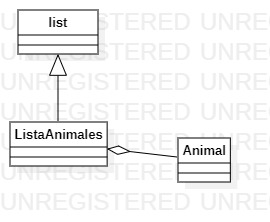

+ En el diagrama anterior se representó una generalización/especialización con lista como súper clase de Lista Animales y una asociación de tipo agregación donde ListaAnimales es un agregado de objetos del tipo Animal

In [31]:
class Animal():
    
    def __init__(self, nombre_cient):
        self.nombre_cient = nombre_cient
        

In [32]:
#dir(list)

In [33]:
class ListaAnimales(list):
 
    pass

In [34]:
capibaraX = Animal('Hydrochoerus hydrochaeris')
capibaraX.nombre_cient

'Hydrochoerus hydrochaeris'

In [35]:
LA = ListaAnimales()
LA.append(capibaraX)

In [36]:
LA[0].nombre_cient

'Hydrochoerus hydrochaeris'

In [37]:
LA.append(Animal('Anura'))
for i in LA:
    print(i.nombre_cient)

Hydrochoerus hydrochaeris
Anura


In [38]:
class ListaLuchadores(list):
    pass

In [39]:
luchadores = ListaLuchadores()
luchadores

[]

In [40]:
luchadores.append(bd)
luchadores[0].nombre

'Blue Demon'

### Otro ejemplo
+ Note que el atributo breed y el atributo buddy no se inicializan con \__init\__(self), sino después de haberse ejecutado los métodos set_breed() y setBuddy() respectivamente
+ Usando dir() puede darse cuenta cómo un objeto es dinámico y puede cambiar

In [41]:
class Dog:

    def __init__(self, name, age):  
        self.name = name
        self.age = age

    def bark(self):
        print("bark bark!")

    def doginfo(self):
        print(self.name + " is " + str(self.age) + " year(s) old.")

    def birthday(self):
        self.age +=1

    def setBuddy(self, buddy): # buddy es otro objeto
        self.amigo = buddy     # Se crea un atributo de instancia llamado amigo y se le asigna el objeto buddy recibido
        buddy.amigo = self     # Al atributo amigo del objeto recibido se le asigna el objeto que llama referenciado con self
        
    def set_breed(self,raza):
        self.breed = raza

In [42]:
dir(Dog)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bark',
 'birthday',
 'doginfo',
 'setBuddy',
 'set_breed']

In [43]:
perrito_ozzy = Dog("Ozzy", 2) 
dir(perrito_ozzy)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'bark',
 'birthday',
 'doginfo',
 'name',
 'setBuddy',
 'set_breed']

In [44]:
perrito_ozzy.set_breed('Terrier')

In [45]:
dir(perrito_ozzy)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'bark',
 'birthday',
 'breed',
 'doginfo',
 'name',
 'setBuddy',
 'set_breed']

### Se asocian dos objetos

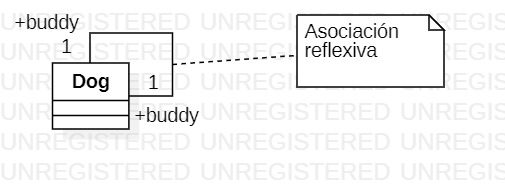

In [46]:
perrito_filou = Dog("Filou", 8)
# El perro amigo tiene que existir previamente
perrito_ozzy.setBuddy(perrito_filou)
# Ahora perrito_ozzy tiene otro atributo. Véalo con dir()

In [47]:
dir(perrito_ozzy)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'amigo',
 'bark',
 'birthday',
 'breed',
 'doginfo',
 'name',
 'setBuddy',
 'set_breed']

In [48]:
print(perrito_ozzy.amigo.name)
print(perrito_ozzy.amigo.age)

print(perrito_filou.amigo.name)
print(perrito_filou.amigo.age)
perrito_ozzy.amigo.doginfo()

Filou
8
Ozzy
2
Filou is 8 year(s) old.


### Dos formas de conocer la clase de un objeto

In [49]:
type(perrito_ozzy)

__main__.Dog

In [50]:
perrito_ozzy.__class__

__main__.Dog

### Cada objeto tiene asociado un diccionario con sus atributos de datos

In [51]:
perrito_ozzy.__dict__

{'name': 'Ozzy',
 'age': 2,
 'breed': 'Terrier',
 'amigo': <__main__.Dog at 0x198c4c01f50>}

### Ejemplo de clase vacía de la que se crean objetos y se generan atributos
+ Los atributos se adicionan al diccionario de atributos del objeto

In [52]:
class Robot:   # Clase vacía
    pass

# Dos objetos de la clase Robot()
x = Robot()
y = Robot()

# Se le crean nuevos atributos a los objetos y se les asignan valores
x.name = "Marvin"
x.build_year = "1979"
 
y.name = "Caliban"
y.build_year = "1993"
 
print(x.name)

Marvin


In [53]:
x.__dict__

{'name': 'Marvin', 'build_year': '1979'}

### Diccionario de atributos de la clase

Observe que la clase Robot no tiene los tributos name ni build_year, pero sí el objeto x (celda anterior).

In [54]:
Robot.__dict__

mappingproxy({'__module__': '__main__',
              '__dict__': <attribute '__dict__' of 'Robot' objects>,
              '__weakref__': <attribute '__weakref__' of 'Robot' objects>,
              '__doc__': None})

Observe a continuación tanto lo que aparece en el diccionario de la clase luchador, como lo que aparece en el diccionario del objeto bd.

In [55]:
Luchador.__dict__

mappingproxy({'__module__': '__main__',
              'deportista': True,
              'set_deportista': <classmethod(<function Luchador.set_deportista at 0x00000198C4BAB7E0>)>,
              '__init__': <function __main__.Luchador.__init__(self, nombre, edad, tipo)>,
              'tiempovida': <function __main__.Luchador.tiempovida(self)>,
              'llavepreferida': <function __main__.Luchador.llavepreferida(self, llave)>,
              '__dict__': <attribute '__dict__' of 'Luchador' objects>,
              '__weakref__': <attribute '__weakref__' of 'Luchador' objects>,
              '__doc__': None})

In [56]:
bd.__dict__

{'nombre': 'Blue Demon', 'edad': 78}

### Redefinición de clase Robot con métodos get() y set()

+ get() sirve para devolver el valor de atributos sin hacer referencia a ellos, de manera que pueda hacer "ocultamiento" de manera protegida o privada

In [57]:
class Robot:
 
    def __init__(self, name=None):  # Si al inicializar el objeto no se le asigna nombre, se le pone None por defecto
        self.__name = name   # Con doble subrayado al inicio indicamos que lo queremos privado
        self.prueba = True
        
    def say_hi(self):
        if self.__name:
            print("Hi, I am " + self.__name)
        else:
            print("Hi, I am a robot without a name")
            
    def set_name(self, name): # Quien desee fuera de esta clase cambiar el valor de name debe llamar a este método
        self.__name = name
        
    def get_name(self):   # Quien desee fuera de esta clase conocer el valor de name debe llamar a este método
        return self.__name
    

In [58]:
x = Robot()
x.set_name("Henry")         # Se crea el objeto con nombre
x.say_hi()

Hi, I am Henry


In [59]:
y = Robot()                 # Se crea el objeto sin nombre
y.say_hi()

Hi, I am a robot without a name


In [60]:
y.set_name(x.get_name()) # Se pasa el nombre de x y entonces y se llamará igual
print(y.get_name())

Henry


In [61]:
try:
    x.__name  # El atributo es privado y solo se puede acceder a través de un método tipo gettter
except Exception as e:
    print(e)

'Robot' object has no attribute '__name'


In [62]:
x.get_name()

'Henry'

In [63]:
x.prueba  # El atributo es público

True

## Ejercicio
Agregar un atributo adicional "build_year" con getters y setters a la clase Robot.

In [64]:
# Celda para la solución del ejercicio




## Ocultamiento de información. Atributos públicos, protegidos y privados

Coloque en el archivo attribute_test.py la siguiente clase
<code>
    class A():
    
    def __init__(self):
        self.__priv = "I am private"
        self._prot = "I am protected"
        self.pub = "I am public"
    <code>

In [65]:
from attribute_test import A
x = A()
x.pub      # hay "visibilidad" del atributo; no está oculto para los que no sean miembros de la clase

ModuleNotFoundError: No module named 'attribute_test'

In [ ]:
x.pub = x.pub + " and my value can be changed"
x.pub

'I am public and my value can be changed'

In [ ]:
x._prot

'I am protected'

In [ ]:
try:
    x.__priv  # No hay visibilidad para los miembros privados.
except Exception as e:
    print(e)

'A' object has no attribute '__priv'


## Destructor

Es el método que elimina un objeto. Normalmente no es necesario redefinirlo y se usa el método mágico por defecto. Esto se debe a que Python cuenta con recolección de basura. El algunos casos específicos se requiere y entonces se redefine el método \__ del \__ ()

Puede ver más ejemplos en https://www.geeksforgeeks.org/destructors-in-python/ 

In [ ]:
class Robot():
    
    def __init__(self, name):
        print(name + " has been created!")
        
    def __del__(self):
        print ("Robot has been destroyed")
        

In [ ]:
x = Robot("Tik-Tok")

Tik-Tok has been created!


In [ ]:
y = Robot("Jenkins")

Jenkins has been created!


In [ ]:
# Dos referencias al mismo objeto
z = x

In [ ]:
x,z

(<__main__.Robot at 0x1988f5896f0>, <__main__.Robot at 0x1988f5896f0>)

__z es otro objeto con el mismo nombre de x y no requiere ser inicializadado__

In [ ]:
print("Deleting x")

Deleting x


In [ ]:
# No se destruye porque hay otra referencia al mismo objeto
del x

In [ ]:
del y

Robot has been destroyed


In [ ]:
try:
    x
except Exception as e:
    print(e)

name 'x' is not defined


In [ ]:
z

In [ ]:
try:
    y
except Exception as e:
    print(e)

name 'y' is not defined


## Otros ejemplos de anulación de métodos

Puede usar la función mro() que devuelve el orden en que se atiende la herencia, aplicando el __MRO (Método de Resolución de Orden de Python)__
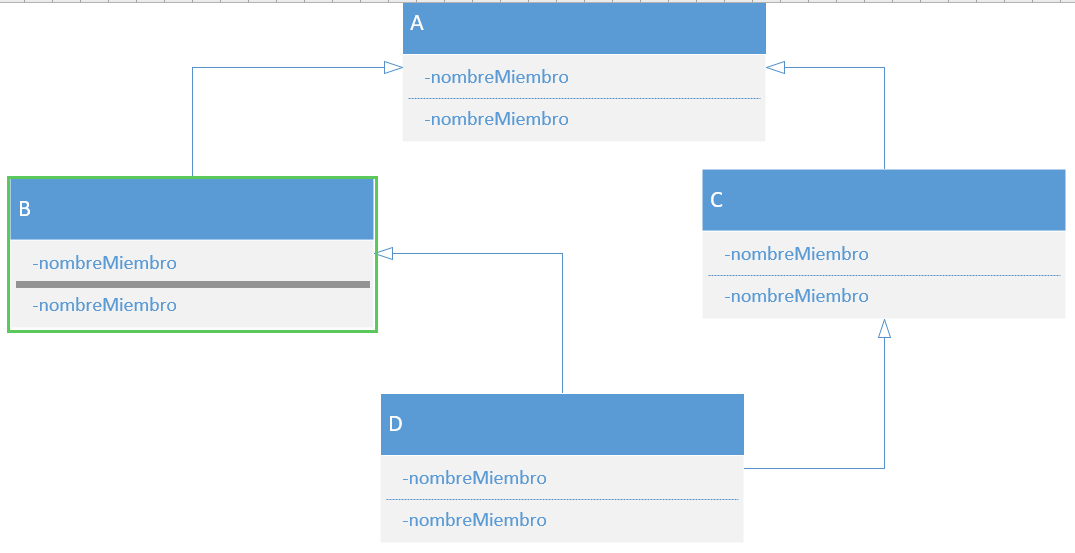

In [ ]:
class A:
    def m(self):
        print("m of A called")

class B(A):
    pass
    
class C(A):
    def m(self):                 # Anula al método m() de las superclases
        print("m of C called")

class D(B,C):
    pass

x = D()
x.m()

m of C called


In [ ]:
D.mro()

[__main__.D, __main__.B, __main__.C, __main__.A, object]

### Ejemplo 1. El método m() en la clase D se sobreescribe (anula al heredado)

In [ ]:
class A:
    def m(self):
        print("m of A called")

class B(A):
    def m(self):
        print("m of B called")  # Anula al método m() de las superclases
    
class C(A):
    def m(self):
        print("m of C called")  # Anula al método m() de las superclases

class D(B,C):
    def m(self):
        print("m of D called")  # Anula al método m() de las superclases

In [ ]:
x = D()
x.m()


m of D called


In [ ]:
D.mro()

[__main__.D, __main__.B, __main__.C, __main__.A, object]

In [ ]:
B.m(x)

m of B called


In [ ]:
B.mro()

[__main__.B, __main__.A, object]

In [ ]:
C.m(x)


m of C called


In [ ]:
A.m(x)


m of A called


In [ ]:
A.mro()

[__main__.A, object]

### Ejemplo 2. El método m() en la clase D se sobreescribe y además llama a los de las superclases.

In [ ]:
class A:
    def m(self):
        print("m of A called")

class B(A):
    def m(self):
        print("m of B called")
        A.m(self)
    
class C(A):
    def m(self):
        print("m of C called")
        A.m(self)

'''class D(B,C):
    def m(self):
        print("m of D called")
        B.m(self)
        C.m(self)
'''
class D(B,C):
    def m(self):
        print("m of D called")
        B.m(self)
        C.m(self)
        A.m(self)

In [ ]:
x =D()
x.m()

m of D called
m of B called
m of A called
m of C called
m of A called
m of A called


### Ejemplo 3. El método m() en la clase D se sobreescribe usando super()

La siguiente solución evita el problema del diamante usando el método super() que llama al método del mismo nombre de la superclase y evita duplicados

In [ ]:
class A:
    def m(self):
        print("m of A called")

class B(A):
    def m(self):
        print("m of B called")
        super().m() # para ejecutar m() de las superclases usando MRO
    
class C(A):
    def m(self):
        print("m of C called")
        super().m()      # para ejecutar m() de las superclases usando MRO

class D(B,C):
    def m(self):
        print("m of D called")
        super().m() # para ejecutar m() de las superclases usando MRO


In [ ]:
a1 =A()
a1.m()

m of A called


In [ ]:
b1 =B()
b1.m()

m of B called
m of A called


In [ ]:
c1 =C()
c1.m()

m of C called
m of A called


In [ ]:
d1 =D()
d1.m()

m of D called
m of B called
m of C called
m of A called


### super() aplicado al inicializador

In [ ]:
class A:
    def __init__(self):
        print("A.__init__")

class B(A):
    def __init__(self):
        print("B.__init__")
        super().__init__()
    
class C(A):
    def __init__(self):
        print("C.__init__")
        super().__init__()

class D(B,C):
    def __init__(self):
        print("D.__init__")
        super().__init__()

In [ ]:
D.mro()

[__main__.D, __main__.B, __main__.C, __main__.A, object]

### Atributo
Recuerde que '\__ main \__' es el nombre del ámbito en el que se ejecuta el código de nivel superior. 

In [ ]:
b1 = B()
b1

B.__init__
A.__init__


In [ ]:
d1 =D()
d1

D.__init__
B.__init__
C.__init__
A.__init__


## Ejemplo de clases Contact, AddressHolder y Friend con herencia múltiple


+ Se usan parámetros de tipo keyword y parámetro flexible **kwargs

In [ ]:
class Contact:
    # Esto no es un buen diseño. Solo sirve para el ejemplo, pero en la realidad no debe hacerse
    all_contacts = []   # Atributo de clase. Es una lista de contactos con todos los objetos de tipo Contact
    
    def __init__(self, name=None, email=None, **kwargs):
        super().__init__(**kwargs)
        self.name = name
        self.email = email
        self.all_contacts.append(self)
        
class AddressHolder:
    def __init__(self, street=None, city=None, state=None, code=None, **kwargs):
        super().__init__(**kwargs)
        self.street = street
        self.city = city
        self.state = state
        self.code = code

class Friend(Contact, AddressHolder):
    def __init__(self, phone='', **kwargs):
        super().__init__(**kwargs)
        self.phone = phone


In [ ]:
c = Contact('Ana','ana@iteso.mx')
ah = AddressHolder('M Otero','Gdl','Jal',45070)


In [ ]:
# No importa el orden de los argumentos porque son palabras clave
f = Friend(phone =45070,name ='Pepe',email ='pepe@iteso.mx',street ='LMateos',city ='Gdl',state ='Jal')

In [ ]:
for i in c.all_contacts:
    print(i.name)

Ana
Pepe


+ Si se elimina un objeto contacto, deberá quitarse de la lista. Si no programa esa acción provocará un error.
+ Lo correcto es primero eliminarlo de la lista y después destruirlo

In [ ]:
Contact.all_contacts.remove(c)

In [ ]:
for i in c.all_contacts:
    print(i.name)
# Ya no está el objeto c en la lista

Pepe


In [ ]:
# Pero sigue existiendo el objeto c
c.name

'Ana'

In [ ]:
# Se elimina el objeto c
del c

In [ ]:
try:
    c.name
except Exception as e:
    print(e)

name 'c' is not defined


## Ejemplo que resalta el polimorfismo

In [ ]:
class Shark():
    def swim(self):
        print("The shark is swimming.")

    def swim_backwards(self):
        print("The shark cannot swim backwards, but can sink backwards.")

    def skeleton(self):
        print("The shark's skeleton is made of cartilage.")


class Clownfish():
    def swim(self):
        print("The clownfish is swimming.")

    def swim_backwards(self):
        print("The clownfish can swim backwards.")

    def skeleton(self):
        print("The clownfish's skeleton is made of bone.")

In [ ]:
sammy = Shark()
casey = Clownfish()

# fish se instancia con un objeto de la clase Shark y con otro de la clase Clownfish
# Se ejecutan los métodos correspondientes
for fish in (sammy, casey):
    fish.swim()
    fish.swim_backwards()
    fish.skeleton()
